In [99]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

In [100]:
#Case 1: k = 1e-15 || CO2 injection at 380°C + H2O || mass flux = 6kg/s

In [101]:
k_CO2_1em15 = pd.read_csv('CO2_1A_csv.csv')
#Energy production in Joules (bc. h_w or h_g is in kJ/kg) - *1000 because initially mass flow was divided by 1000
k_CO2_1em15["Energy Production at this timestep"] = (k_CO2_1em15.mass_kg_h2o_extracted_this_timestep * k_CO2_1em15.h_w)*1000
k_CO2_1em15["Cumulative Energy Produced"] = k_CO2_1em15["Energy Production at this timestep"].cumsum()
k_CO2_1em15["Cumulative Produced CO2"] = k_CO2_1em15["mass_kg_co2_extracted_this_timestep"].cumsum()
# Injected CO2:time * mass flow CO2
k_CO2_1em15["Injected CO2 [kg]"] = k_CO2_1em15["time"]*6
#Conversion to kilotons
k_CO2_1em15["Injected CO2 [kt]"] = k_CO2_1em15["Injected CO2 [kg]"]*1e-6
#Stored CO2:
# = Injected CO2 - produced CO2 [kg]
k_CO2_1em15["Stored CO2 [kt]"] = (k_CO2_1em15["Injected CO2 [kg]"]-k_CO2_1em15["mass_kg_co2_extracted_this_timestep"])*1e-6
#MW produced:
k_CO2_1em15["MW"] = (k_CO2_1em15["Cumulative Energy Produced"]/1e6)/k_CO2_1em15["time"]


k_CO2_1em15["Time [y]"] = k_CO2_1em15["time"]/3.154E7
k_CO2_1em15.rename(columns={"time": "Time [s]","heat_joules_extracted_this_timestep_co2": "Heat Extracted CO2 [Joules]","heat_joules_extracted_this_timestep_h2o": "Heat Extracted H2O [Joules]","mass_kg_co2_extracted_this_timestep":"Mass CO2 Extracted [kg]","mass_kg_h2o_extracted_this_timestep":"Mass H2O Extracted [kg]","temperature":"Temperature [°C]","mu_g":"$\u03BC_g$","mu_w":"$\u03BC_w$","rhog":"$\u03C1_g$","rhow":"$\u03C1_w$","h_g":"$h_g$","h_w":"$h_w$","Sg":"$S_g$","Sw":"$S_w$"}, inplace=True)
k_CO2_1em15


,Time [s],$S_g$,$S_w$,$h_g$,$h_w$,Heat Extracted CO2 [Joules],Heat Extracted H2O [Joules],Mass CO2 Extracted [kg],Mass H2O Extracted [kg],$μ_g$,...,$ρ_w$,Temperature [°C],Energy Production at this timestep,Cumulative Energy Produced,Cumulative Produced CO2,Injected CO2 [kg],Injected CO2 [kt],Stored CO2 [kt],MW,Time [y]
0,0,0,0,0.000000,0.000000e+00,0,0.000000e+00,0,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0,0,0.0000,0.0000,NaN,0.000000
1,86400,0,1,457030.863798,3.045161e+06,0,3.083909e+09,0,1007.354092,0.000038,...,127.852873,772.658027,3.067555e+12,3.067555e+12,0,518400,0.5184,0.5184,35.504109,0.002739
2,259200,0,1,457084.397969,3.050061e+06,0,4.928709e+09,0,1608.250468,0.000038,...,126.098268,772.451751,4.905262e+12,7.972817e+12,0,1555200,1.5552,1.5552,30.759326,0.008218
3,604800,0,1,457040.567107,3.052568e+06,0,8.865723e+09,0,2892.446372,0.000038,...,125.136890,772.183924,8.829390e+12,1.680221e+13,0,3628800,3.6288,3.6288,27.781428,0.019176
4,1296000,0,1,456917.500957,3.054136e+06,0,1.629257e+10,0,5316.309335,0.000038,...,124.448306,771.798333,1.623673e+13,3.303894e+13,0,7776000,7.7760,7.7760,25.493009,0.041091
5,2678400,0,1,456714.306201,3.055166e+06,0,3.009007e+10,0,9822.427217,0.000038,...,123.883447,771.282180,3.000915e+13,6.304808e+13,0,16070400,16.0704,16.0704,23.539458,0.084921
6,5443200,0,1,456452.077518,3.055947e+06,0,5.531582e+10,0,18066.162985,0.000038,...,123.355758,770.699308,5.520924e+13,1.182573e+14,0,32659200,32.6592,32.6592,21.725700,0.172581
7,10972800,0,1,456184.710811,3.056800e+06,0,1.004601e+11,0,32822.363309,0.000038,...,122.798453,770.202211,1.003314e+14,2.185887e+14,0,65836800,65.8368,65.8368,19.920961,0.347901
8,22032000,0,1,455962.573468,3.057911e+06,0,1.797737e+11,0,58737.630062,0.000038,...,122.189520,769.922843,1.796145e+14,3.982032e+14,0,132192000,132.1920,132.1920,18.073856,0.698542
9,44150400,0,1,455801.142242,3.059302e+06,0,3.167406e+11,0,103459.471712,0.000038,...,121.536481,769.856217,3.165137e+14,7.147169e+14,0,264902400,264.9024,264.9024,16.188232,1.399822


In [102]:
#Water Only: k=1e10-15 --> mass flux = 11 kg/s for water + injection Temp 380°C
k_H2O_1em15 = pd.read_csv("H2O_1B_csv.csv")
#Energy production in Joules (bc. h_w or h_g is in kJ/kg)
k_H2O_1em15["Energy Production at this timestep"] = (k_H2O_1em15.mass_kg_h2o_extracted_this_timestep * k_H2O_1em15.h_w)*1000
k_H2O_1em15["Cumulative Energy Produced"] = k_H2O_1em15["Energy Production at this timestep"].cumsum()
#MW produced:

k_H2O_1em15["MW"] = (k_H2O_1em15["Cumulative Energy Produced"]/1e6)/k_H2O_1em15["time"]

k_H2O_1em15["Time [y]"] = k_H2O_1em15["time"]/3.154E7
k_H2O_1em15.rename(columns={"time": "Time [s]","heat_joules_extracted_this_timestep_co2": "Heat Extracted CO2 [Joules]","heat_joules_extracted_this_timestep_h2o": "Heat Extracted H2O [Joules]","mass_kg_co2_extracted_this_timestep":"Mass CO2 Extracted [kg]","mass_kg_h2o_extracted_this_timestep":"Mass H2O Extracted [kg]","temperature":"Temperature [°C]","mu_g":"$\u03BC_g$","mu_w":"$\u03BC_w$","rhog":"$\u03C1_g$","rhow":"$\u03C1_w$","h_g":"$h_g$","h_w":"$h_w$","Sg":"$S_g$","Sw":"$S_w$"}, inplace=True)
k_H2O_1em15

,Time [s],$S_g$,$S_w$,$h_g$,$h_w$,Heat Extracted CO2 [Joules],Heat Extracted H2O [Joules],Mass CO2 Extracted [kg],Mass H2O Extracted [kg],$μ_g$,$μ_w$,$ρ_g$,$ρ_w$,Temperature [°C],Energy Production at this timestep,Cumulative Energy Produced,MW,Time [y]
0,0,0,0,0.000000,0.000000e+00,0,0.000000e+00,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,NaN,0.000000
1,86400,0,1,457030.863798,3.045161e+06,0,3.083909e+09,0,1007.354092,0.000038,0.000033,208.938255,127.852873,772.658027,3.067555e+12,3.067555e+12,35.504109,0.002739
2,259200,0,1,457084.397969,3.050061e+06,0,4.928709e+09,0,1608.250468,0.000038,0.000032,207.112200,126.098268,772.451751,4.905262e+12,7.972817e+12,30.759326,0.008218
3,604800,0,1,457040.567106,3.052568e+06,0,8.865723e+09,0,2892.446372,0.000038,0.000032,206.090837,125.136890,772.183924,8.829390e+12,1.680221e+13,27.781428,0.019176
4,1296000,0,1,456917.500811,3.054136e+06,0,1.629257e+10,0,5316.310195,0.000038,0.000032,205.339007,124.448308,771.798333,1.623673e+13,3.303894e+13,25.493011,0.041091
5,2678400,0,1,456714.287153,3.055166e+06,0,3.009057e+10,0,9822.590215,0.000038,0.000032,204.701606,123.883583,771.282163,3.000964e+13,6.304858e+13,23.539644,0.084921
6,5443200,0,1,456451.528509,3.055937e+06,0,5.533884e+10,0,18073.724095,0.000038,0.000032,204.094292,123.358968,770.698741,5.523217e+13,1.182807e+14,21.730002,0.172581
7,10972800,0,1,456178.747567,3.056707e+06,0,1.008578e+11,0,32953.074213,0.000038,0.000032,203.475497,122.826840,770.195395,1.007279e+14,2.190086e+14,19.959229,0.347901
8,22032000,0,1,455929.413241,3.057477e+06,0,1.832435e+11,0,59878.516120,0.000038,0.000032,202.883443,122.317141,769.883270,1.830772e+14,4.020858e+14,18.250082,0.698542
9,44150400,0,1,455684.563753,3.058011e+06,0,3.357085e+11,0,109696.152591,0.000038,0.000032,202.388207,121.897943,769.716728,3.354521e+14,7.375379e+14,16.705123,1.399822


In [103]:
# Cumulative Energy Production over 20 Years:

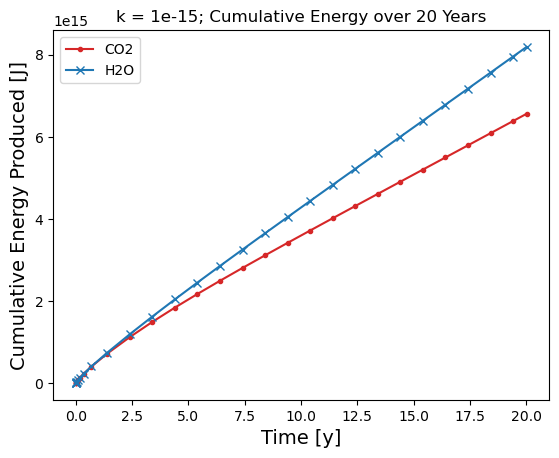

In [104]:
# Cum Energy Produced: Water case vs CO2 
plt.plot(k_CO2_1em15["Time [y]"], k_CO2_1em15["Cumulative Energy Produced"],'C3', marker=".", linestyle ='-', label='CO2')
plt.plot(k_H2O_1em15["Time [y]"], k_H2O_1em15["Cumulative Energy Produced"],'C0', marker="x", linestyle ='-', label='H2O')
plt.title("k = 1e-15; Cumulative Energy over 20 Years")
plt.xlabel('Time [y]',fontsize =14)
plt.ylabel(r'Cumulative Energy Produced [J]',fontsize=14)
plt.legend()
plt.savefig('Figures/Case1/Case1_cum_energy_k_1em15.png')

In [105]:
#Time after which CO2 production begins (if any): 

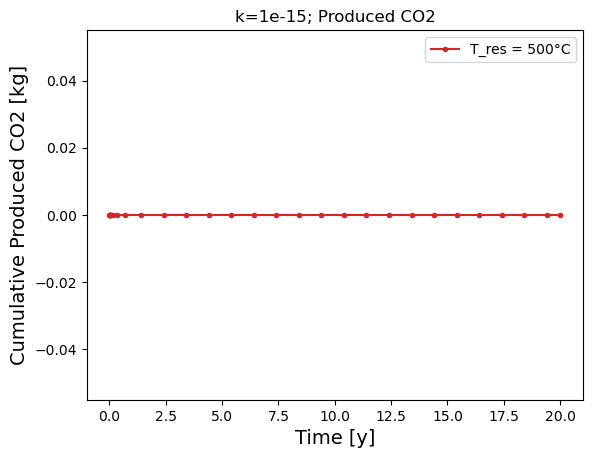

In [106]:
plt.plot(k_CO2_1em15["Time [y]"], k_CO2_1em15["Cumulative Produced CO2"],'C3', marker=".", linestyle ='-', label='T_res = 500°C')
plt.title("k=1e-15; Produced CO2")
plt.xlabel('Time [y]',fontsize =14)
plt.ylabel(r'Cumulative Produced CO2 [kg]',fontsize=14)
plt.legend()
plt.savefig('Figures/Case1/Case1_co2_production_k_1em15.png')

In [107]:
# Mass of injected CO2 at 6kg/s CO2 mass flux

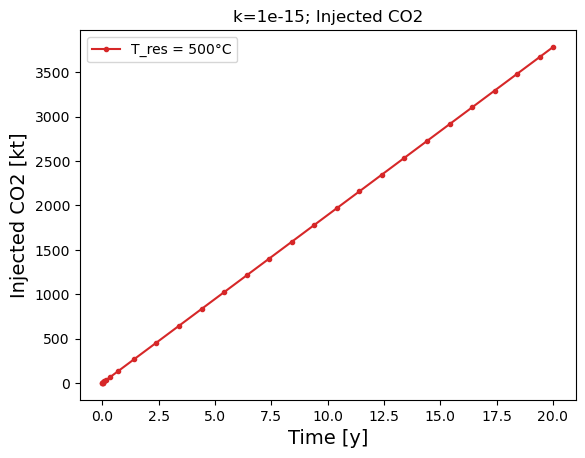

In [108]:
plt.plot(k_CO2_1em15["Time [y]"], k_CO2_1em15["Injected CO2 [kt]"],'C3', marker=".", linestyle ='-', label='T_res = 500°C')
plt.title("k=1e-15; Injected CO2")
plt.xlabel('Time [y]',fontsize =14)
plt.ylabel(r'Injected CO2 [kt]',fontsize=14)
plt.legend()
plt.savefig('Figures/Case1/Case1_co2_injection_k_1em15.png')

In [109]:
#Stored CO2 in kt at mass flux 6kg/s 

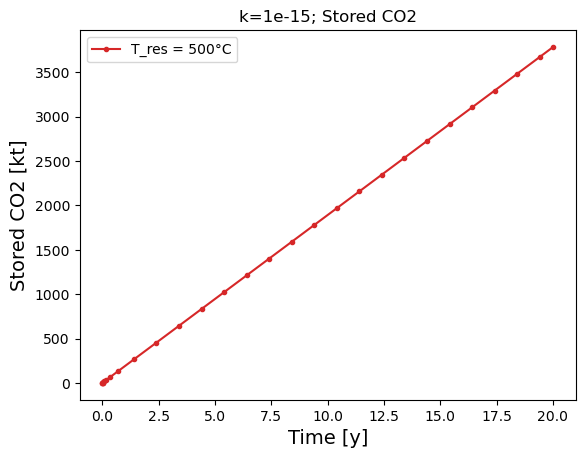

In [110]:
plt.plot(k_CO2_1em15["Time [y]"], k_CO2_1em15["Stored CO2 [kt]"],'C3', marker=".", linestyle ='-', label='T_res = 500°C')
plt.title("k=1e-15; Stored CO2")
plt.xlabel('Time [y]',fontsize =14)
plt.ylabel(r'Stored CO2 [kt]',fontsize=14)
plt.legend()
plt.savefig('Figures/Case1/Case1_co2_stored_k_1em15.png')